# Ising Model

### About
The Ising Model is a simple model of a solid that exhibits a phase transition resembling ferromagnetism.
In this model, a “spin direction” is assigned to each vertex on a graph. The standard Hamiltonian for an
Ising system includes only nearest-neighbor interactions and each spin direction may be either “up” (+1)
or “down” (-1), though generalized models may include long-range interactions and more choices for spin
direction.

The Ising Hamiltonian can be written as 

$$H=−J∑⟨ij⟩SiSj$$

- The spins  Si  can take values  ±1 ,
- ⟨ij⟩  implies nearest-neighbor interaction only,
- J>0  is the strength of exchange interaction.


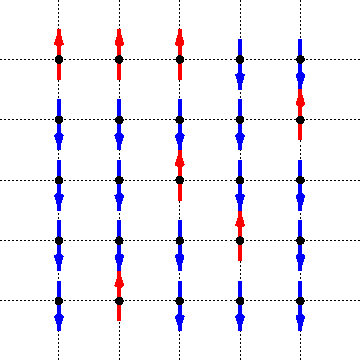

## Metropolis Algorthim 
#### The Idea: 
it wants to find the equilibrium state of mu in the magnet in a particular temperature. so we start with a random lattice of spins, some pointing up and some pointing down. then making it move based on the algorthim above.

The code below uses the monte carlos simulation with the metroplis algorithm the steps for this are:
   1. prepare the initial config of N spins.
   2. flip the spin of an random chosen lattice.
   3. calculate the change in energy dE
   4. if DE < 0 then would accept the move. otherwise will accept the move with the probability exp^(-dE/T). this should satisfy the balance condition to ensure equilivrium state. 
   5. repeat steps 2-4.

In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye
from vpython import * 
from scipy.linalg import eigh
from IPython.display import display, Markdown, Latex
from IPython.display import HTML
from mplEasyAnimate import animation
from tqdm import tqdm
from base64 import b64encode

<IPython.core.display.Javascript object>

In [2]:
def initialstate(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state



def mcmove(config, beta):
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

def calcEnergy(config):
    energy = 0 
    
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2.  # to compensate for over-counting



def calcMag(config):
    
    mag = np.sum(config)
    return mag

In [3]:
nt      = 32          #  number of temperature points
N       = 10          #  size of the lattice, N x N
eqSteps = 2**8        #  number of MC sweeps for equilibration
mcSteps = 2**10       #  number of MC sweeps for calculation


T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 

In [4]:
for tt in range(nt):
    config = initialstate(N)
    
    E1 = M1 = E2 = M2 = 0
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene


    # divide by number of sites and iteractions to obtain intensive values    
    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

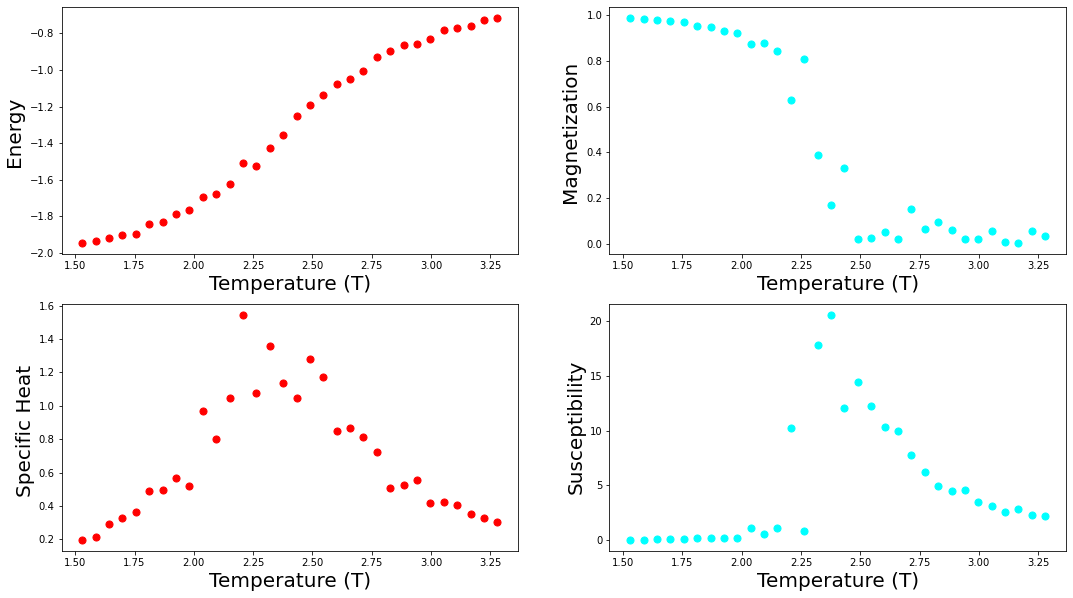

In [5]:
#----------------------------------------------------------------------
#  plot the calculated values   
#----------------------------------------------------------------------

f = plt.figure(figsize=(18, 10)); #  


sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='Red')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='Cyan')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');


sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='Red')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   


sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='Cyan')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

In [6]:
%matplotlib inline
# Simulating the Ising model


class Ising():  
    
    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    

    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        configlist = [] #a list of config arrays
        N, temp     = 64, .4        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        configlist.append(np.copy(config))
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp) 
            configlist.append(np.copy(config))
            if i == 1:       self.configPlot(f, config, i, N, 2);
            if i == 4:       self.configPlot(f, config, i, N, 3);
            if i == 32:      self.configPlot(f, config, i, N, 4);
            if i == 100:     self.configPlot(f, config, i, N, 5);
            if i == 1000:    self.configPlot(f, config, i, N, 6);
                
        return configlist
                 
                    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()
    
    def animate(self, filename, datalist, skip=10):
        
        Niterations = 300
        N, temp     = 64, .4
        
        with animation(filename, fps=30) as anim:
            t_offsets = np.arange(Niterations+1)
            i=0
            for offset in tqdm(t_offsets):
                if i>=0 and i % (skip-1) == 0:
                    fig = plt.figure(figsize=(15, 15), dpi=80);    
                    X, Y = np.meshgrid(range(N), range(N))
                    plt.pcolormesh(X, Y, datalist[i], cmap=plt.cm.RdBu);
                    anim.add_frame(fig)
                    plt.close(fig)
                i=i+1

C:\Users\JUSTIN~1\AppData\Local\Temp/ipykernel_11260/2013987289.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);


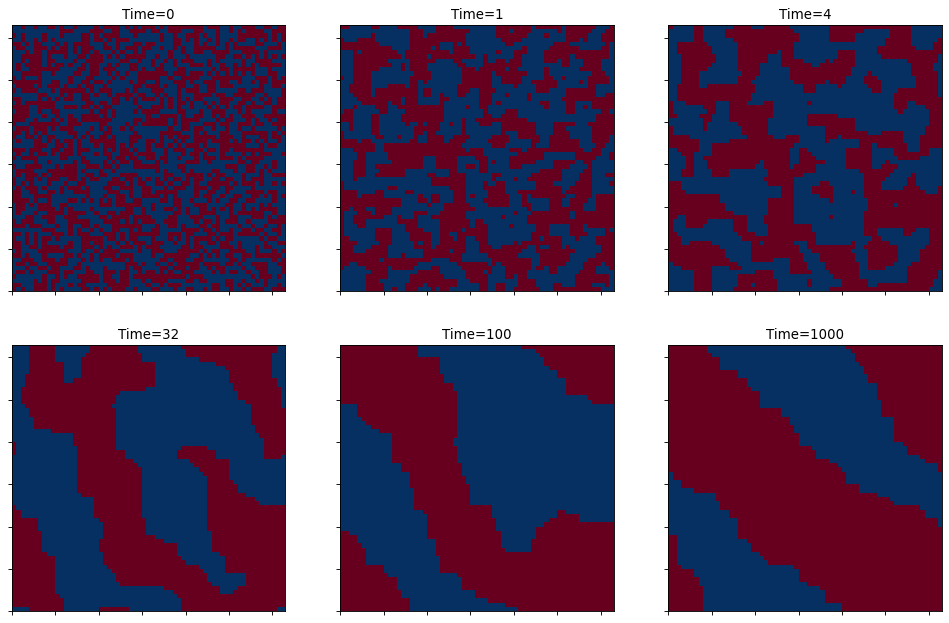

In [7]:
rm = Ising()
configlist = rm.simulate()


In [8]:
#create animation
filename = 'ising.mp4'
rm.animate(filename, configlist, 2)

#display animation
mp4 = open(filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

  0%|                                                                                          | 0/301 [00:00<?, ?it/s]C:\Users\JUSTIN~1\AppData\Local\Temp/ipykernel_11260/2013987289.py:70: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, datalist[i], cmap=plt.cm.RdBu);
100%|████████████████████████████████████████████████████████████████████████████████| 301/301 [07:37<00:00,  1.52s/it]


### References

https://www.asc.ohio-state.edu/braaten.1//statphys/Ising_MatLab.pdf

https://www.youtube.com/watch?v=K--1hlv9yv0